In [39]:
# 3(c) Maximum Likelihood Estimation

import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

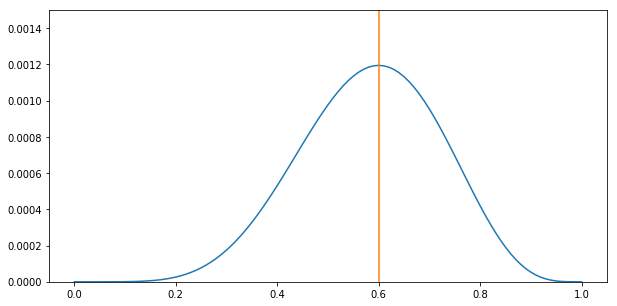

In [15]:
def likelihood_plot(n, true_x):
    theta = np.linspace(0, 1, 101)
    L = theta**true_x*((1-theta)**(n-true_x))
    
    plt.figure(figsize=(10,5))
    plt.plot(theta, L)

likelihood_plot(10, 6)
plt.ylim(0, 0.0015)
plt.plot([0.6, 0.6], [0, 1])
plt.savefig('3c')

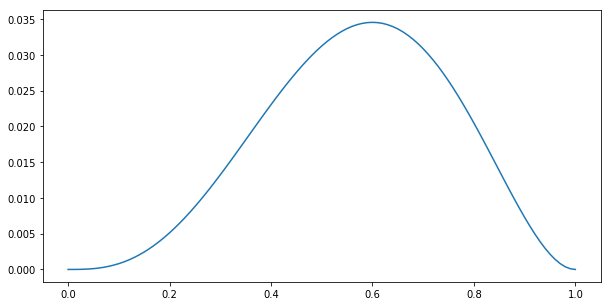

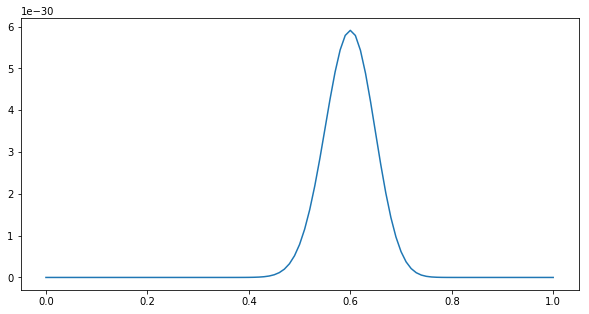

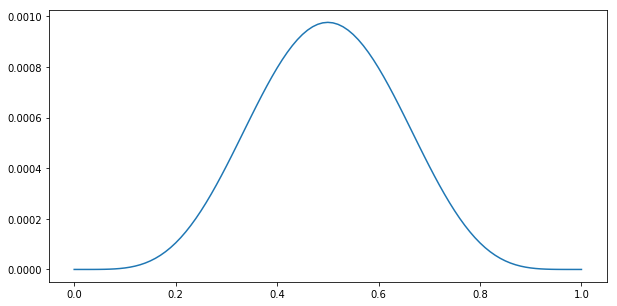

In [16]:
# 3(d)

likelihood_plot(5, 3)
plt.savefig('3d1')
likelihood_plot(100, 60)
plt.savefig('3d2')
likelihood_plot(10, 5)
plt.savefig('3d3')

In [51]:
# 4 Implementation: Linear and Polynomial Regression

"""
Author      : Yi-Chieh Wu, Sriram Sankararaman
"""

# This code was adapted from course material by Jenna Wiens (UMichigan).

# python libraries
import os

# numpy libraries
import numpy as np

# matplotlib libraries
import matplotlib.pyplot as plt

######################################################################
# classes
######################################################################

class Data :
    
    def __init__(self, X=None, y=None) :
        """
        Data class.
        
        Attributes
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        """
        
        # n = number of examples, d = dimensionality
        self.X = X
        self.y = y
    
    def load(self, filename) :
        """
        Load csv file into X array of features and y array of labels.
        
        Parameters
        --------------------
            filename -- string, filename
        """
        
        # determine filename
        dir = os.path.dirname('__file__')
        f = os.path.join(dir, '..', 'data', filename)
        
        # load data
        with open(f, 'r') as fid :
            data = np.loadtxt(fid, delimiter=",")
        
        # separate features and labels
        self.X = data[:,:-1]
        self.y = data[:,-1]
    
    def plot(self, **kwargs) :
        """Plot data."""
        
        if 'color' not in kwargs :
            kwargs['color'] = 'b'
        
        plt.scatter(self.X, self.y, **kwargs)
        plt.xlabel('x', fontsize = 16)
        plt.ylabel('y', fontsize = 16)
        plt.show()

In [56]:
# wrapper functions around Data class
def load_data(filename) :
    data = Data()
    data.load(filename)
    return data

def plot_data(X, y, **kwargs) :
    data = Data(X, y)
    data.plot(**kwargs)


class PolynomialRegression() :
    
    def __init__(self, m=1, reg_param=0) :
        """
        Ordinary least squares regression.
        
        Attributes
        --------------------
            coef_   -- numpy array of shape (d,)
                       estimated coefficients for the linear regression problem
            m_      -- integer
                       order for polynomial regression
            lambda_ -- float
                       regularization parameter
        """
        self.coef_ = None
        self.m_ = m
        self.lambda_ = reg_param
    
    
    def generate_polynomial_features(self, X) :
        """
        Maps X to an mth degree feature vector e.g. [1, X, X^2, ..., X^m].
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,1), features
        
        Returns
        --------------------
            Phi     -- numpy array of shape (n,(m+1)), mapped features
        """
        
        n,d = X.shape
        
        ### ========== TODO : START ========== ###
        # part b: modify to create matrix for simple linear model
        # part g: modify to create matrix for polynomial model
        Phi = X
        m = self.m_
        
        #Phi = np.concatenate((np.ones((n, 1)), Phi), axis=1)

        temp = X
        for _ in range(1, m):
            temp = temp*X
            Phi = np.concatenate((Phi, temp), axis=1)
            
        Phi = np.concatenate((np.ones((n, 1)), Phi), axis=1)
        
        ### ========== TODO : END ========== ###
        
        return Phi
    
    
    def fit_GD(self, X, y, eta=None,
                eps=0, tmax=10000, verbose=False) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using least squares batch gradient descent.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
            eta     -- float, step size
            eps     -- float, convergence criterion
            tmax    -- integer, maximum number of iterations
            verbose -- boolean, for debugging purposes
        
        Returns
        --------------------
            self    -- an instance of self
        """
        if self.lambda_ != 0 :
            raise Exception("GD with regularization not implemented")
        
        if verbose :
            plt.subplot(1, 2, 2)
            plt.xlabel('iteration')
            plt.ylabel(r'$J(\theta)$')
            plt.ion()
            plt.show()
        
        X = self.generate_polynomial_features(X) # map features
        n,d = X.shape
        eta_input = eta
        self.coef_ = np.zeros(d)                 # coefficients
        err_list  = np.zeros((tmax,1))           # errors per iteration
        
        # GD loop
        for t in xrange(tmax) :
            ### ========== TODO : START ========== ###
            # part f: update step size
            # change the default eta in the function signature to 'eta=None'
            # and update the line below to your learning rate function
            if eta_input is None :
                eta = 1/(1+t) # change this line
            else :
                eta = eta_input
            ### ========== TODO : END ========== ###
                
            ### ========== TODO : START ========== ###
            # part d: update theta (self.coef_) using one step of GD
            # hint: you can write simultaneously update all theta using vector math
                grad_J = 2*np.dot(X.T, np.dot(X, self.coef_)-y)
                self.coef_ += -eta*grad_J
            # track error
            # hint: you cannot use self.predict(...) to make the predictions
            y_pred = np.dot(X, self.coef_) # change this line
            err_list[t] = np.sum(np.power(y - y_pred, 2)) / float(n)                
            ### ========== TODO : END ========== ###
            
            # stop?
            if t > 0 and abs(err_list[t] - err_list[t-1]) <= eps :
                break
            
            # debugging
            if verbose :
                x = np.reshape(X[:,1], (n,1))
                cost = self.cost(x,y)
                plt.subplot(1, 2, 1)
                plt.cla()
                plot_data(x, y)
                self.plot_regression()
                plt.subplot(1, 2, 2)
                plt.plot([t+1], [cost], 'bo')
                plt.suptitle('iteration: %d, cost: %f' % (t+1, cost))
                plt.draw()
                plt.pause(0.05) # pause for 0.05 sec
        
        print 'number of iterations: %d' % (t+1)
        
        return self
    
    
    def fit(self, X, y, l2regularize = None ) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using the closed form solution.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
            l2regularize    -- set to None for no regularization. set to positive double for L2 regularization
                
        Returns
        --------------------        
            self    -- an instance of self
        """
        
        X = self.generate_polynomial_features(X) # map features
        
        ### ========== TODO : START ========== ###
        # part e: implement closed-form solution
        # hint: use np.dot(...) and np.linalg.pinv(...)
        #       be sure to update self.coef_ with your solution
        self.coef_ = np.dot(np.dot(np.linalg.pinv(np.dot(X.T, X)), X.T), y)
        ### ========== TODO : END ========== ###
    
    
    def predict(self, X) :
        """
        Predict output for X.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
        
        Returns
        --------------------
            y       -- numpy array of shape (n,), predictions
        """
        if self.coef_ is None :
            raise Exception("Model not initialized. Perform a fit first.")
        
        X = self.generate_polynomial_features(X) # map features
        
        ### ========== TODO : START ========== ###
        # part c: predict y
        y = np.dot(X, self.coef_)
        ### ========== TODO : END ========== ###
        
        return y
    
    
    def cost(self, X, y) :
        """
        Calculates the objective function.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        
        Returns
        --------------------
            cost    -- float, objective J(theta)
        """
        ### ========== TODO : START ========== ###
        # part d: compute J(theta)
        cost = np.sum((self.predict(X)-y)**2)
        ### ========== TODO : END ========== ###
        return cost
    
    
    def rms_error(self, X, y) :
        """
        Calculates the root mean square error.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        
        Returns
        --------------------
            error   -- float, RMSE
        """
        ### ========== TODO : START ========== ###
        # part h: compute RMSE
        error = np.sqrt(self.cost(X, y)/X.shape[0])
        ### ========== TODO : END ========== ###
        return error
    
    
    def plot_regression(self, xmin=0, xmax=1, n=50, **kwargs) :
        """Plot regression line."""
        if 'color' not in kwargs :
            kwargs['color'] = 'r'
        if 'linestyle' not in kwargs :
            kwargs['linestyle'] = '-'
        
        X = np.reshape(np.linspace(0,1,n), (n,1))
        y = self.predict(X)
        plot_data(X, y, **kwargs)
        plt.show()

Visualizing data...


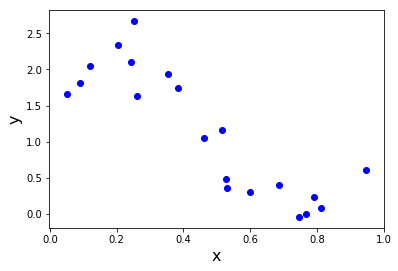

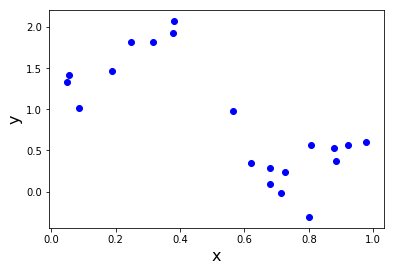

Investigating linear regression...
number of iterations: 10000
for eta: 0.0001
coefficients: [ 2.27044798 -2.46064834]
cost: 4.0863970368
time to converge: 0.231194019318
number of iterations: 7020
for eta: 0.001
coefficients: [ 2.4464068 -2.816353 ]
cost: 3.91257640579
time to converge: 0.190950155258
number of iterations: 764
for eta: 0.01
coefficients: [ 2.44640703 -2.81635346]
cost: 3.91257640579
time to converge: 0.0238811969757
number of iterations: 10000
for eta: 0.0407
coefficients: [-9.40470931e+18 -4.65229095e+18]
cost: 2.71091652001e+39
time to converge: 0.233417987823

coefficients: [ 2.44640709 -2.81635359]
cost: 3.91257640579
time to converge: 0.000150203704834

number of iterations: 2
coefficients: [0. 0.]
cost: 40.2338474097
time to converge: 0.000378131866455
Investigating polynomial regression...
for m: 0
train_error: 0.944924621691
test_error: 0.742704836122
for m: 1
train_error: 0.944924621691
test_error: 0.742704836122
for m: 2
train_error: 0.944813607725
test_erro

<Figure size 432x288 with 0 Axes>

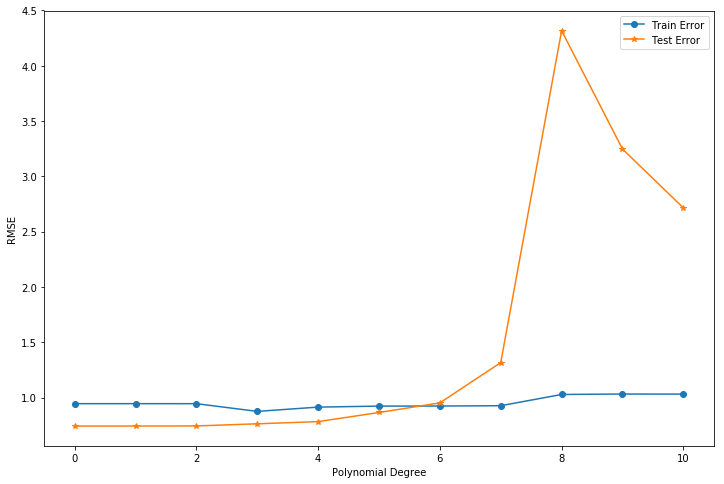

In [63]:
######################################################################
# main
######################################################################

def main() :
    # load data
    train_data = load_data('regression_train.csv')
    test_data = load_data('regression_test.csv')
    
    
    ### ========== TODO : START ========== ###
    # part a: main code for visualizations
    print 'Visualizing data...'
    plot_data(train_data.X, train_data.y)
    plt.savefig('4a1')
    plot_data(test_data.X, test_data.y)
    plt.savefig('4a2')
    ### ========== TODO : END ========== ###
    
    
    
    ### ========== TODO : START ========== ###
    # parts b-f: main code for linear regression
    print 'Investigating linear regression...'
    model = PolynomialRegression()
    
    for eta in (10**-4, 10**-3, 10**-2, 0.0407):
        start = time.time()
        model.fit_GD(train_data.X, train_data.y, eta=eta)
        train_time = time.time()-start
        print('for eta: {}'.format(eta))
        print('coefficients: {}'.format(model.coef_))
        print('cost: {}'.format(model.cost(train_data.X, train_data.y)))
        print('time to converge: {}'.format(train_time))
        
    # (e) using closed form model
    print ''
    
    model = PolynomialRegression()
    start = time.time()
    model.fit(train_data.X, train_data.y)
    train_time = time.time()-start
    print('coefficients: {}'.format(model.coef_))
    print('cost: {}'.format(model.cost(train_data.X, train_data.y)))
    print('time to converge: {}'.format(train_time))
    
    # (f) using 1/(1+t) for gradient descent learning rate
    print ''
    
    model = PolynomialRegression()
    start = time.time()
    model.fit_GD(train_data.X, train_data.y)
    train_time = time.time()-start
    print('coefficients: {}'.format(model.coef_))
    print('cost: {}'.format(model.cost(train_data.X, train_data.y)))
    print('time to converge: {}'.format(train_time))
    
    ### ========== TODO : END ========== ###
    
    
    
    ### ========== TODO : START ========== ###
    # parts g-i: main code for polynomial regression
    print 'Investigating polynomial regression...'
    train_errors, test_errors = [], []
    x = np.linspace(0, 10, 11, dtype=int)
    
    for m in x:
        model = PolynomialRegression(m=m)
        model.fit(train_data.X, test_data.y)
        train_error = model.rms_error(train_data.X, train_data.y)
        train_errors.append(train_error)
        test_error = model.rms_error(test_data.X, test_data.y)
        test_errors.append(test_error)
        print('for m: {}'.format(m))
        print('train_error: {}'.format(train_error))
        print('test_error: {}'.format(test_error))
        
    plt.figure(figsize=(12,8))
    plt.ylabel('RMSE')
    plt.xlabel('Polynomial Degree')
    plt.plot(x, train_errors, label='Train Error', marker='o')
    plt.plot(x, test_errors, label='Test Error', marker='*')
    plt.legend()
    plt.savefig('4i')
    
    ### ========== TODO : END ========== ###
    
    
    
    ### ========== TODO : START ========== ###
    # parts j-k (extra credit): main code for regularized regression
    print 'Investigating regularized regression...'
        
    ### ========== TODO : END ========== ###
    
    
    
    print "Done!"

if __name__ == "__main__" :
    main()
